# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

Importing Required Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('Customer Churn Analysis')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.shape

(7043, 21)

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Normally if a Datatype is object then it is categorical, from the above we can conclude all the Data types mentioned as Object are catogorical

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Total charges is numercial but still we got it as Object, let us check the data

In [16]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

we can see Total charges has 11 null values

In [33]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [34]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

# data visualization

In [78]:
def Data(df,col):
    plt.figure(figsize=(12,8))
    plt.title(col+ ' Vs Churn',fontsize=18)
    sns.countplot(df[col],hue='Churn',data=df)

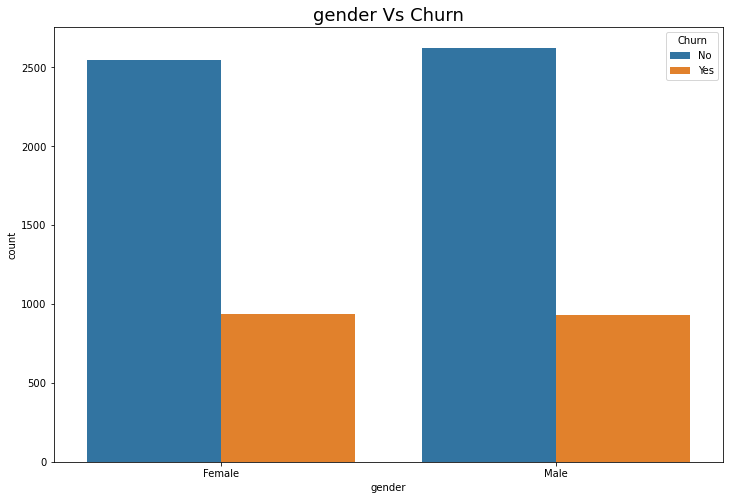

In [79]:
Data(df,'gender')

There is no Diff between churners and non-churners with Gender

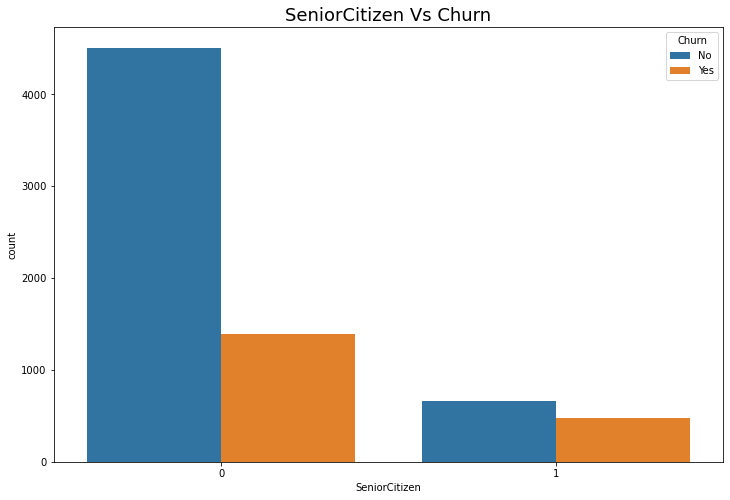

In [67]:
Data(df,'SeniorCitizen')

On the basis of ratio we can see that senior citizens are more churners then other age group

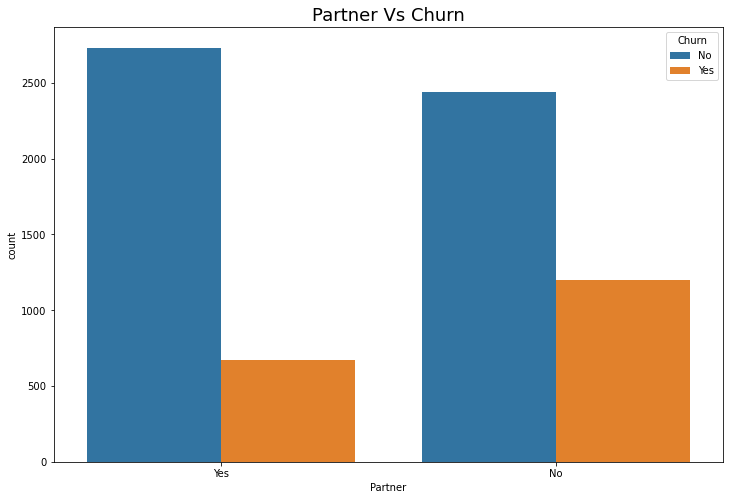

In [73]:
Data(df,'Partner')

Single people are more likly to switch to different network as compared to people who are married/non single

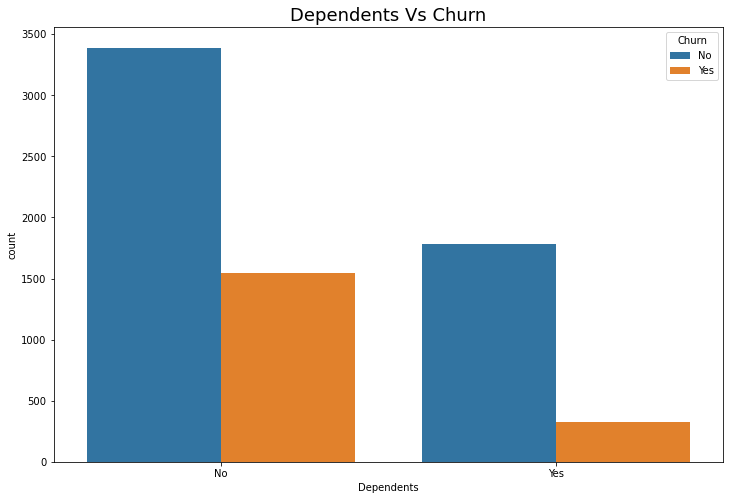

In [80]:
Data(df,'Dependents')

People who has no dependents seems more to switch to different network

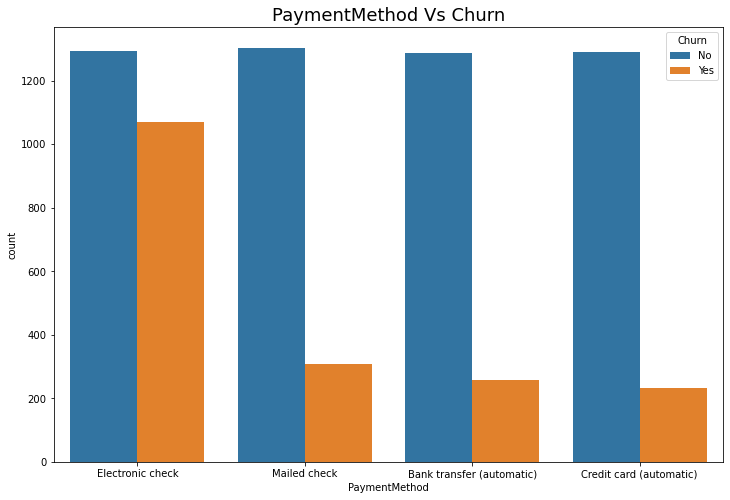

In [81]:
Data(df,'PaymentMethod')

People who are using Elctronic Check for payment method usually churn more than people using credit card/bank transfer/mailed check

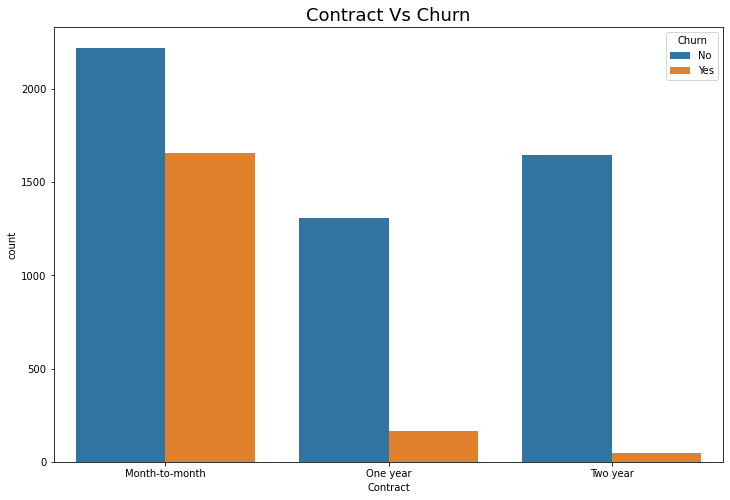

In [86]:
Data(df,'Contract')

we can see that people who avail a month to month contract has the highest chances to churn where as people who has contract for year/two year has least chances to churn.

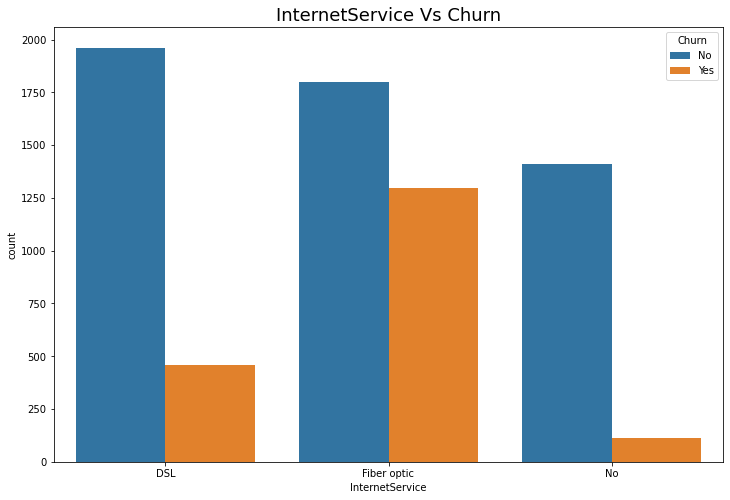

In [88]:
Data(df,'InternetService')

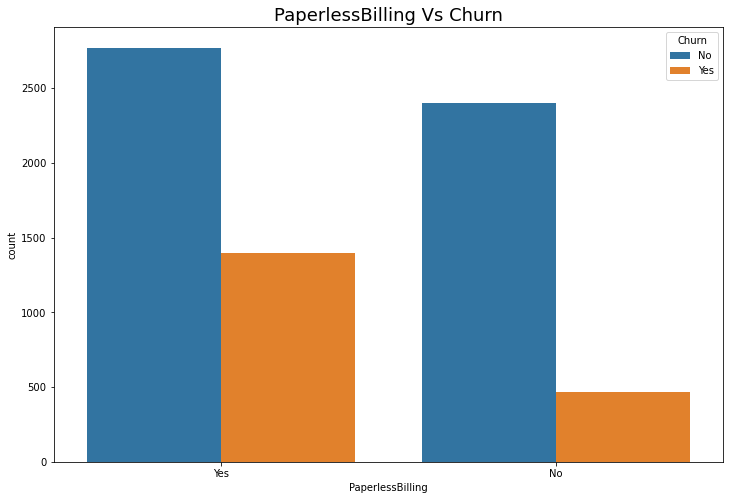

In [89]:
Data(df,'PaperlessBilling')

People who are using online mode for billing and get the billing paper online/mail/pdf are generally churners

No     5174
Yes    1869
Name: Churn, dtype: int64


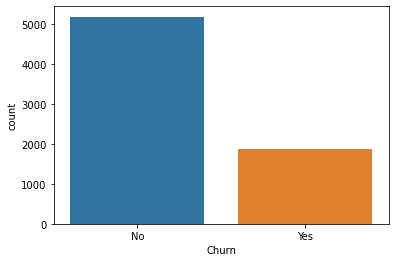

In [93]:
sns.countplot(df['Churn'])
print(df['Churn'].value_counts())

5174 customers with no churn and 1869 customers with yes churn

# Data Distribution

In [94]:
df_numeric=df[['MonthlyCharges','TotalCharges']].copy()

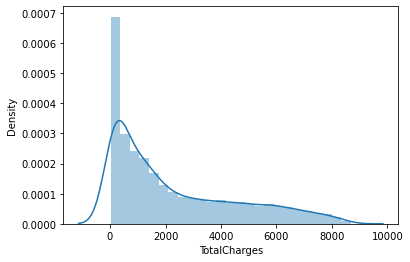

In [95]:
sns.distplot(df_numeric['TotalCharges'],kde=True)
plt.show()

Total Charges value has a peak and then gradually its decreasing

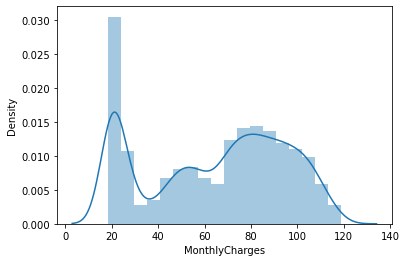

In [96]:
sns.distplot(df['MonthlyCharges'],kde=True)
plt.show()

There are jumps in the dataset

Since the dataset has lot of String values, we will use encoding techniques

# Encoding

In [100]:
from sklearn.preprocessing import OrdinalEncoder

In [101]:
oe=OrdinalEncoder()

In [102]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [103]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# Correlation

In [105]:
dfcorr = df.corr()

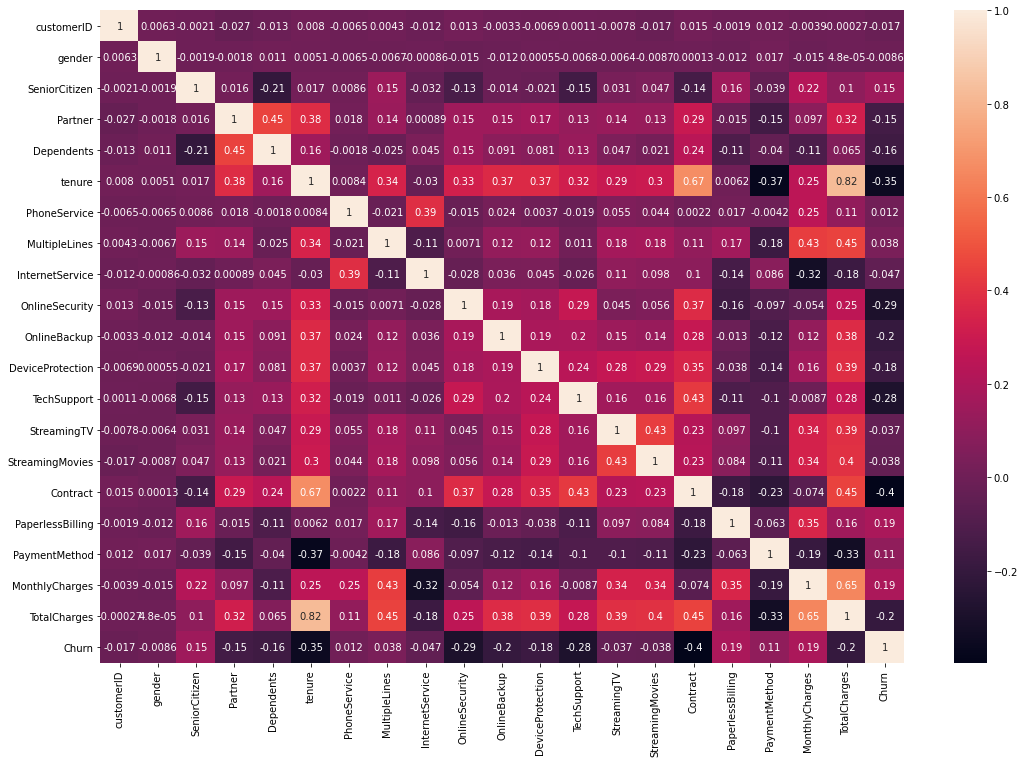

In [112]:
plt.figure(figsize=[18,12])
sns.heatmap(dfcorr,annot=True)
plt.show()

# Observation
CustomerID and Gender is not correlated to any variables.

Partner is slightly correlated with TotalCharges, Contract,Dependents, Tenure.

SeniorCitizen is slightly correlated with MonthlyCharges, PaperlessBilling,Churn.

Tenure is highly correlated with TotalCharges, Contract and slightly correlated with Monthly charges, StreamingMovies,StreamingTV,TechSUpport,DeviceProtection,Online backup,Online security,Multiplelines, Partner.


Dependent is correlated with Partner.

Phone Service is correlated with Internet service.

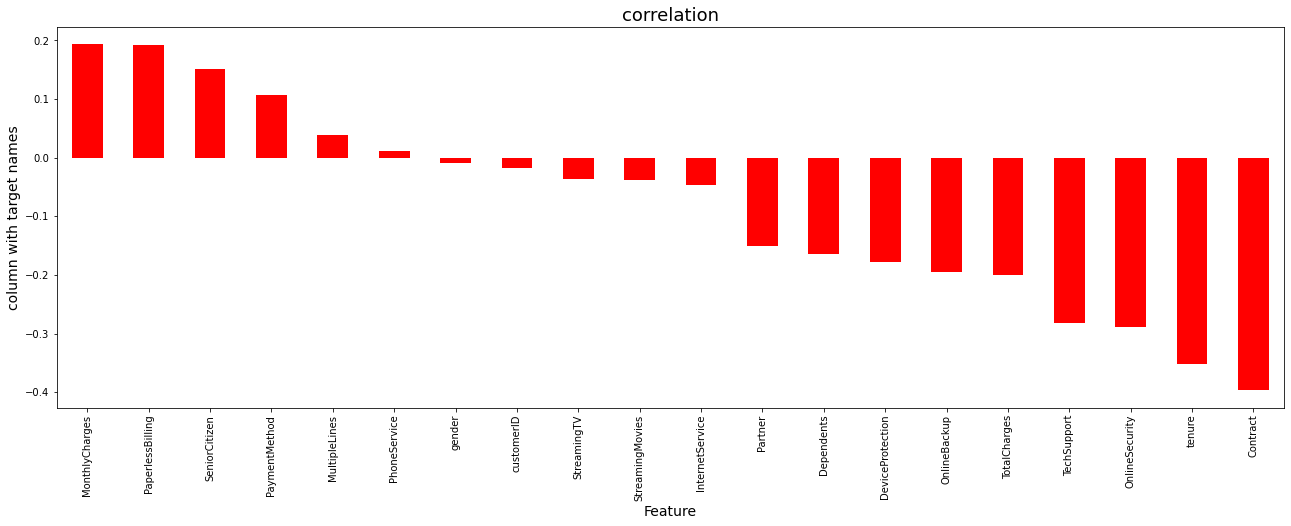

In [117]:
plt.figure(figsize=[22,7])
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

From the above, we can conclude Monthly charges, peperless billing, senior Citizen,payment method,Multiple lines, phone service are +ively correlated remaining items are -ively correlated

# Checking the Skewness

In [118]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

SeniorCitizen-Categorical,
Dependents-Categorical,
PhoneService - Categorical,
TotalCharges- Target Variables,
Churn - Categorical

 Hence, we dont have to deal with skewness

In [120]:
df['TotalCharges']=np.cbrt(df['TotalCharges'])

We have remove skewness to possible extent. Now data points are not skew.

# Checking the Outliers

In [121]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [122]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

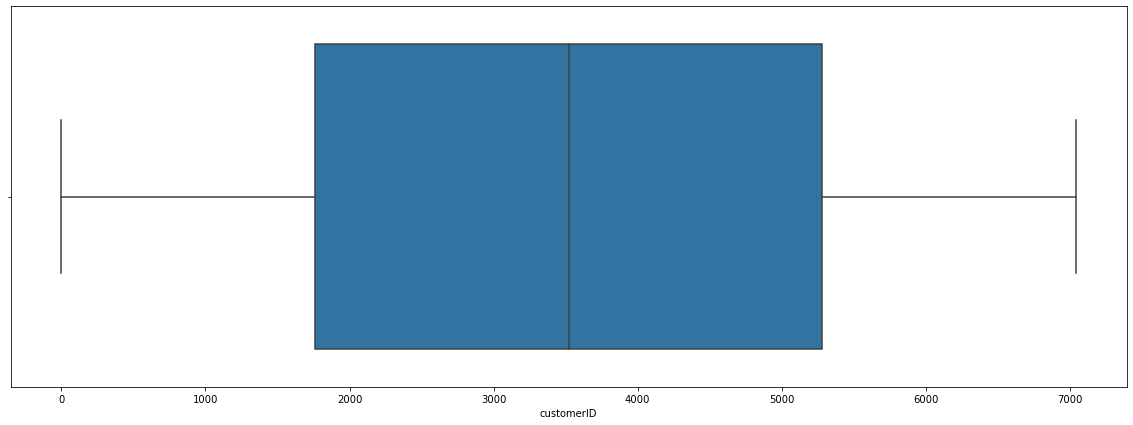

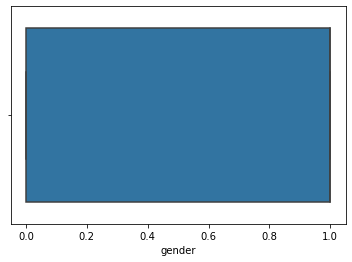

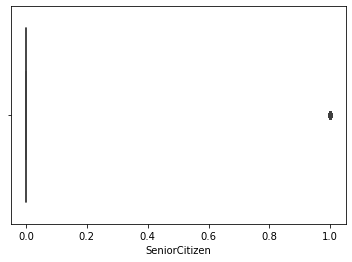

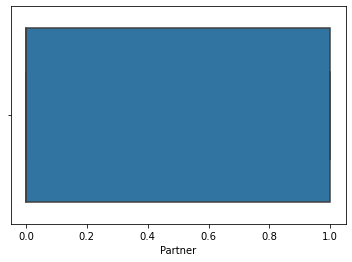

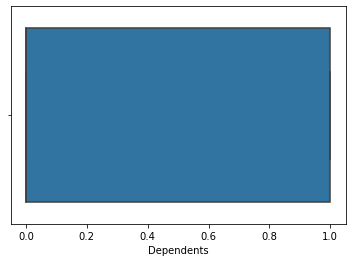

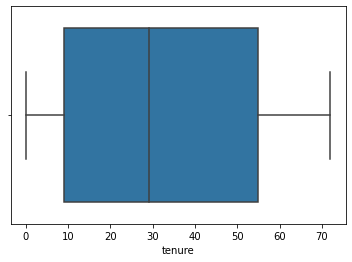

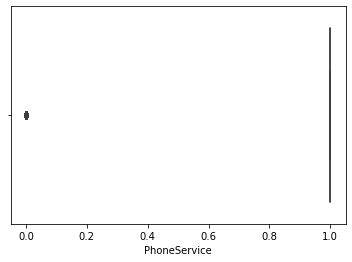

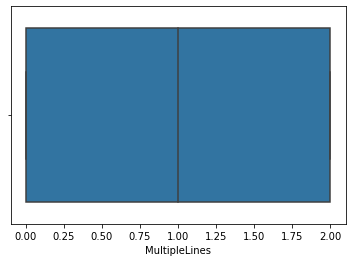

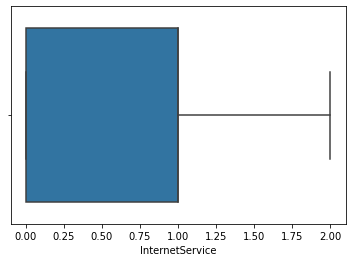

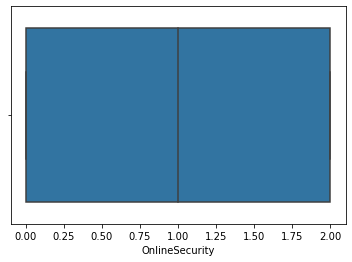

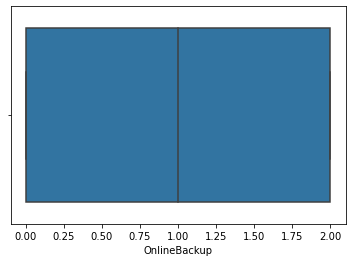

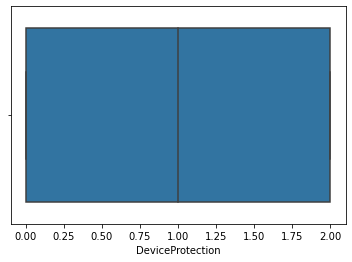

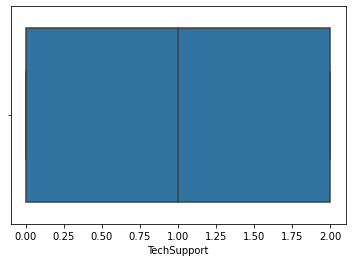

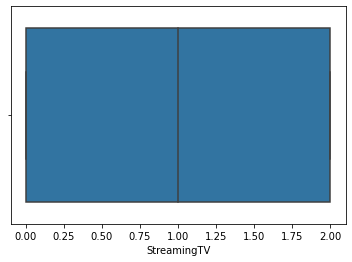

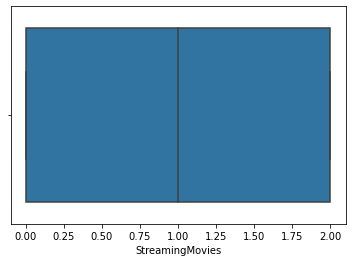

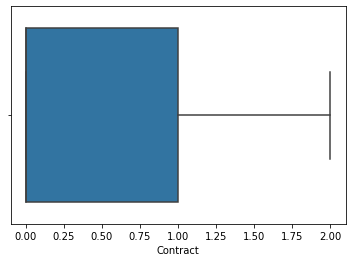

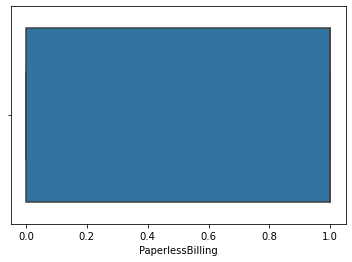

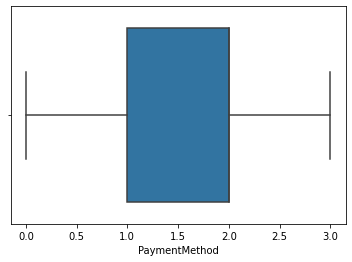

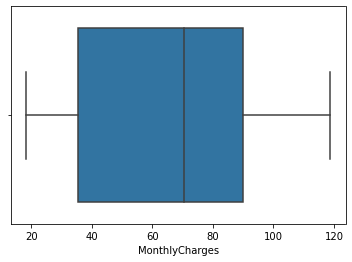

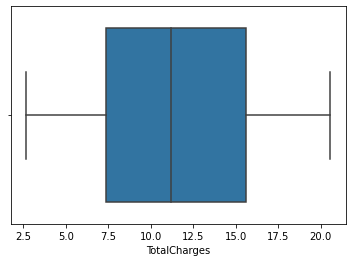

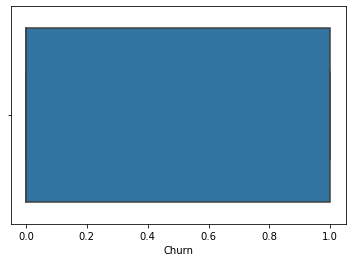

In [123]:
columns= plt.figure(figsize=[20,7])
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

there are outliers in senior citizens but since the data is categorical type, we cannot consider it as outlier

# Splitting the dataset

In [124]:
x=df.drop('TotalCharges',axis=1)
y=df['TotalCharges']

# Scaling the data using Min-Max Scaler

In [125]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_x=mms.fit_transform(x)

In [126]:
df_x = pd.DataFrame(df_x,columns=x.columns)

In [127]:
x=df_x

In [128]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Finding the best random state

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [130]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    lm.score(x_test,y_test)
    ypred=lm.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)

Best accuracy is 0.9509125891655642 for random state 99


In [131]:
lm=LinearRegression()
dtc=DecisionTreeRegressor()
rf=RandomForestRegressor()

model =[lm,dtc,rf]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=46)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('R2 score for',i, 'is',r2_score(pred,y_test))
    score=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i, 'is',score.mean())
    print('Difference between R2 score and Cross Validation Score is',r2_score(pred,y_test) - score.mean())
    print('\t')
    print('\t')

R2 score for LinearRegression() is 0.9449884609622086
Cross validation score for LinearRegression() is 0.9424776122232753
Difference between R2 score and Cross Validation Score is 0.002510848738933258
	
	
R2 score for DecisionTreeRegressor() is 0.9977805078145785
Cross validation score for DecisionTreeRegressor() is 0.9976498735079801
Difference between R2 score and Cross Validation Score is 0.00013063430659843167
	
	
R2 score for RandomForestRegressor() is 0.9989465585240296
Cross validation score for RandomForestRegressor() is 0.9989022903356736
Difference between R2 score and Cross Validation Score is 4.426818835601143e-05
	
	


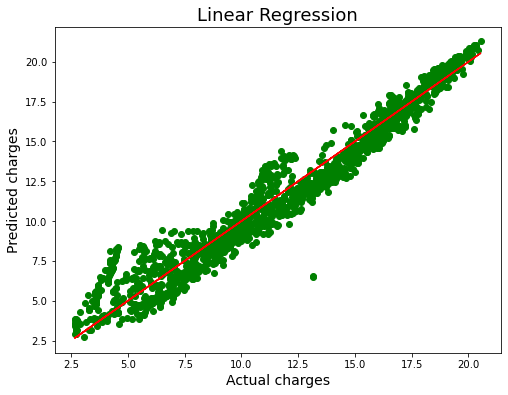

In [132]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=lm.predict(x_test),color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

Best fit line is covering most of the data points which shows good fit of our model

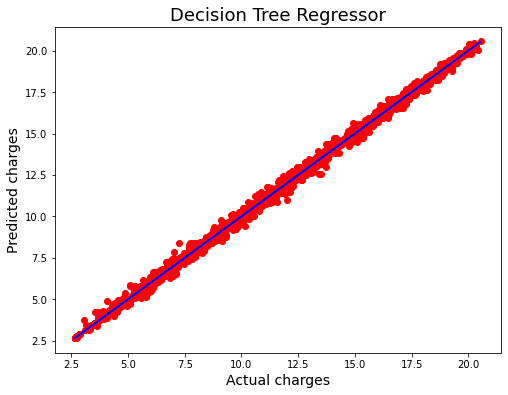

In [133]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=dtc.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Decision Tree Regressor', fontsize=18)
plt.show()

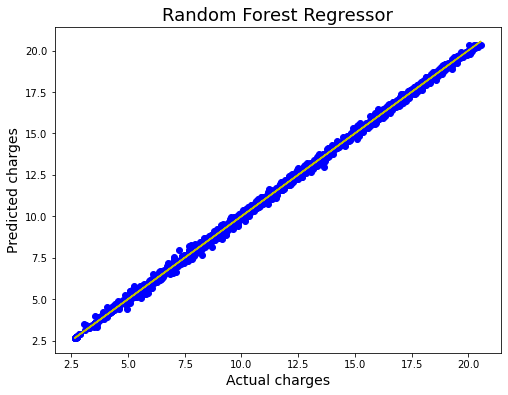

In [135]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=rf.predict(x_test),color='b')
plt.plot(y_test,y_test,color='y')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Random Forest Regressor', fontsize=18)
plt.show()

In [136]:
# Regularization

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [138]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [139]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.390679007263942

In [140]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.39484607243112135

# Hyper Parameter tuning

In [149]:
from sklearn.model_selection import GridSearchCV